# Handwritten Character Recognition  
This notebook demonstrates a Convolutional Neural Network model that accurately classifies characters from A-Z and 0-9.

---

## Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### Dataset
This model is trained using two datasets. 
- One dataset contains the 26 uppercase letters [(A-Z) in csv format](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format).
- For the digits (0-9) the [MNIST dataset in csv format](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv) has been used.

### Loading the Letter Dataset

In [3]:
csv_file_path = "/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv"

The letters dataset is loaded into a Pandas DataFrame and converted to `float32` as it is the preferred type for most Machine Learning libraries.

In [4]:
letter_df = pd.read_csv(csv_file_path).astype("float32")
letter_df.shape
letter_df.rename(columns={'0': "label"}, inplace=True)

In [5]:
letter_df.head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Separating the Features and Labels

In [6]:
letter_data = letter_df.drop("label", axis=1)
letter_label = letter_df["label"]

### Loading the MNIST Dataset

The data is reshaped for the use in the neural network as CNNs expect data in a 3D format(width, height, channels).

In [7]:
train_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

digit_y_train = train_df['label'].values
digit_x_train = train_df.drop(columns=['label']).values

digit_y_test = test_df['label'].values
digit_x_test = test_df.drop(columns=['label']).values

digit_x_train = digit_x_train.reshape(-1, 28, 28)
digit_x_test = digit_x_test.reshape(-1, 28, 28)

In [8]:
letter_data = letter_data.values
type(letter_data)

numpy.ndarray

### Verifying Dataset Dimensions

In [9]:
print("Letter features shape:", letter_data.shape)
print("Letter labels shape:", letter_label.shape)
print("Digit training data shape:", digit_x_train.shape)
print("Digit training labels shape:", digit_y_train.shape)
print("Digit test data shape:", digit_x_test.shape)
print("Digit test labels shape:", digit_y_test.shape)

Letter features shape: (372450, 784)
Letter labels shape: (372450,)
Digit training data shape: (60000, 28, 28)
Digit training labels shape: (60000,)
Digit test data shape: (10000, 28, 28)
Digit test labels shape: (10000,)


### Combining MNIST Training and Test Data

A single dataset is created because we need to split the data differently as our training data and test data needs to have both letters and digits in each.

In [10]:
digit_data = np.concatenate((digit_x_train, digit_x_test))
digit_label = np.concatenate((digit_y_train, digit_y_test))

print(digit_data.shape, digit_label.shape)

(70000, 28, 28) (70000,)


### Adjusting Labels for Combined Dataset

The labels from 0-25 will be allocated for the letters A-Z and 26-35 will be allocated for 0-9

In [11]:
digit_label += 26

### Reshaping Letter Data

Each flattened image in `letter_data` is reshaped from a 1D array to a 3D array of shape (28, 28, 1). `digit_data` is reshaped in the cell below.

In [12]:
data = []

for flattened_image in letter_data:
    image = np.reshape(flattened_image, (28, 28, 1))
    data.append(image)

letter_data = np.array(data, dtype=np.float32)

### Reshaping Digit Data

In [13]:
digit_data = np.reshape(digit_data, (digit_data.shape[0], digit_data.shape[1], digit_data.shape[2], 1))

### Verifying Dimensions

In [14]:
print(letter_data.shape, letter_label.shape)
print(digit_data.shape, digit_label.shape)

(372450, 28, 28, 1) (372450,)
(70000, 28, 28, 1) (70000,)


### Combining both Datasets into a Single Dataset

In [15]:
data = np.concatenate((digit_data, letter_data))
target = np.concatenate((digit_label, letter_label))

print(data.shape, target.shape)

(442450, 28, 28, 1) (442450,)


### Visualizing the Dataset

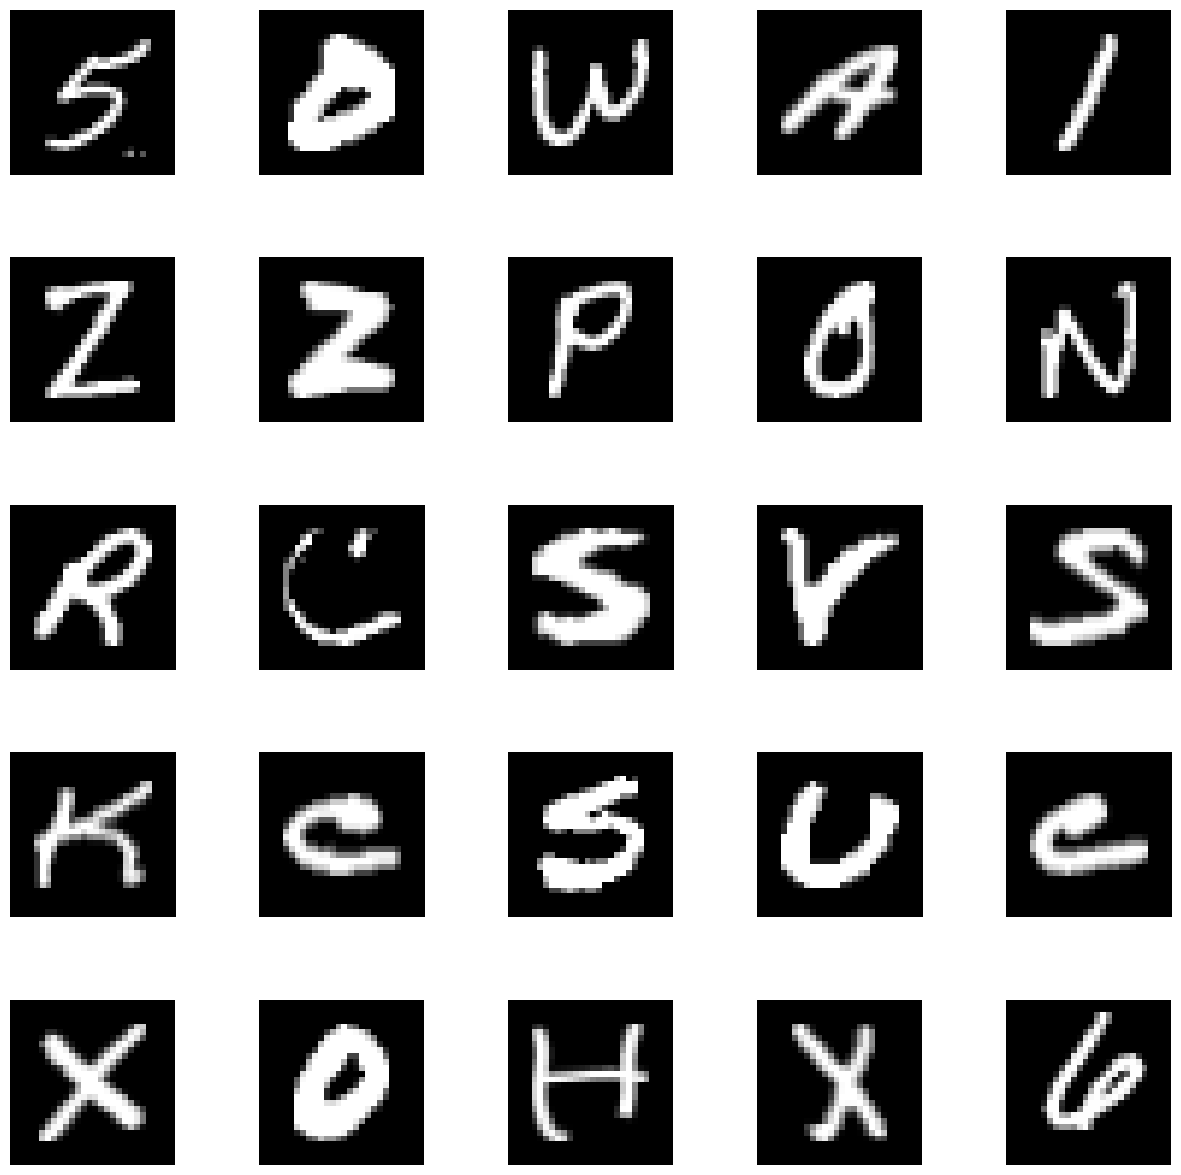

In [16]:
shuffled_data = shuffle(data)
num_images = 25

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

for i in range(num_images):
    ax = axes[i]
    ax.imshow(shuffled_data[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Splitting the Dataset

In [17]:
train_data, test_data, train_labels, test_labels = train_test_split(data, target, test_size=0.2)

### Verifying Dimensions

In [18]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(353960, 28, 28, 1) (353960,)
(88490, 28, 28, 1) (88490,)


# Normalizing Data and Preparing Labels

The pixel values of `train_data` and `test_data` are normalized to the range `0 - 1`, and the labels are prepared using one-hot encoding for model training. The last 2 lines reshape the data to a 4D array with a single channel.

In [19]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], train_data.shape[2], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))

### Verifying Dimensions

In [20]:
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(353960, 28, 28, 1) (88490, 28, 28, 1)
(353960, 36) (88490, 36)


### Plotting Character Frequency Distribution

The output visualization helps us to understand the imbalance of character classes between the training and test datasets, which is important for evaluating model performance.

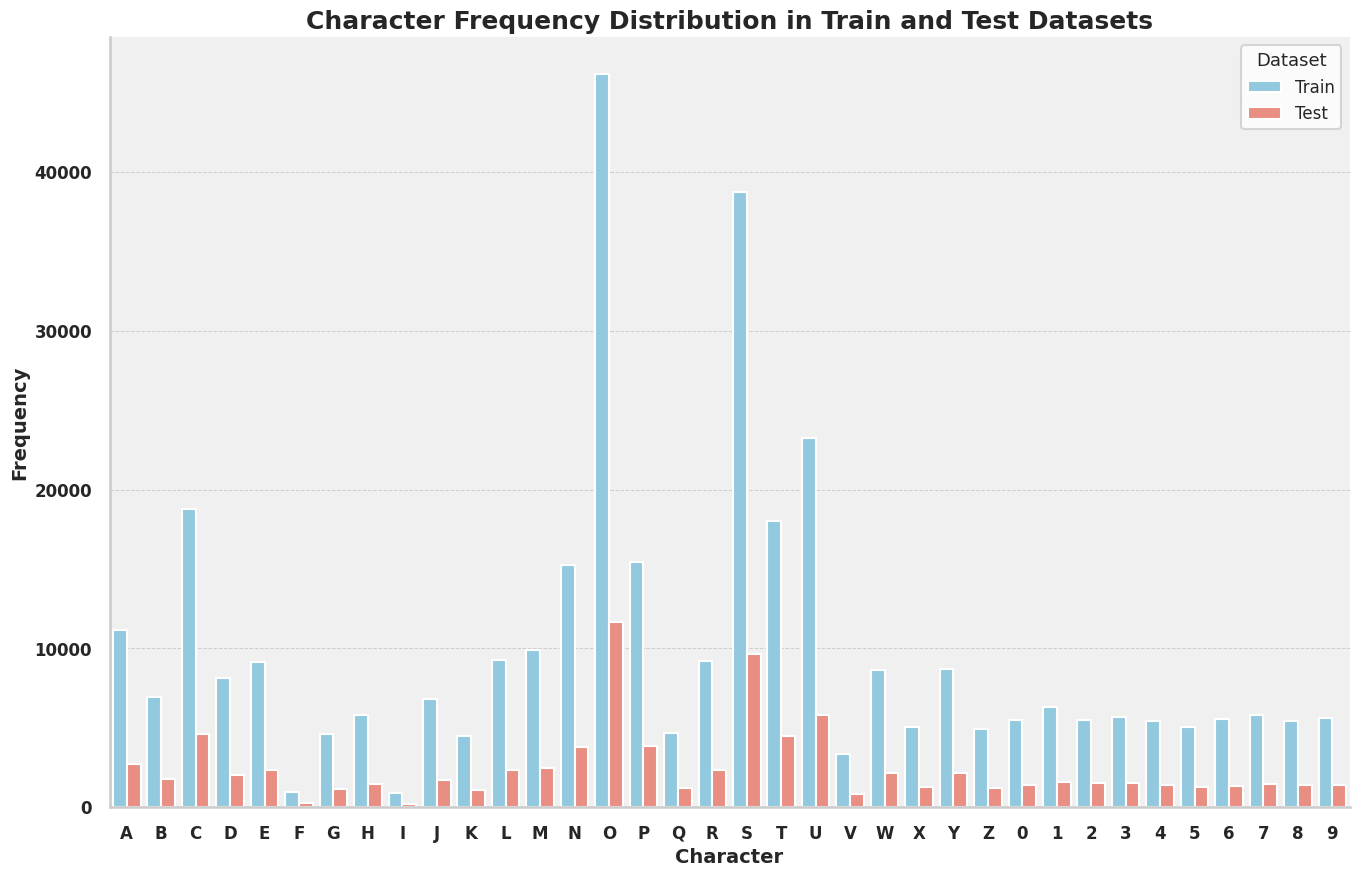

In [21]:
train_label_frequencies = [0 for _ in range(36)]
test_label_frequencies = [0 for _ in range(36)]

for i in range(train_data.shape[0]):
    train_label_frequencies[np.argmax(train_labels[i])] += 1

for i in range(test_data.shape[0]):
    test_label_frequencies[np.argmax(test_labels[i])] += 1

character_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
train_frequencies = train_label_frequencies
test_frequencies = test_label_frequencies

frequency_data = {
    'Character': character_labels * 2,
    'Frequency': train_frequencies + test_frequencies,
    'Dataset': ['Train'] * len(train_frequencies) + ['Test'] * len(test_frequencies)
}

frequency_df = pd.DataFrame(frequency_data)

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(16, 10))
sns.barplot(x='Character', y='Frequency', hue='Dataset', data=frequency_df, palette=['skyblue', 'salmon'])

plt.title("Character Frequency Distribution in Train and Test Datasets", fontsize=18, fontweight='bold')
plt.xlabel("Character", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title="Dataset", title_fontsize='13', fontsize='12')

plt.gca().set_facecolor('#f0f0f0')
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
sns.despine()

plt.show()


# Model Architecture


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

### Building and Compiling the CNN Model

In [23]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 20, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,556 (3.26 MB)

 Trainable params: 855,364 (3.26 MB)

 Non-trainable params: 192 (768.00 B)

### Model Checkpoints for Best Loss and Validation Loss

Two `ModelCheckpoint` callbacks are defined to save the best models based on training loss and validation loss during the training of the CNN model.


In [24]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="../models/best_loss_model.weights.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="../models/best_val_loss_model.weights.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)


### Training the CNN Model

In [35]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=10, 
    batch_size=200, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/10

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 495s 278ms/step - accuracy: 0.9129 - loss: 0.3114 - val_accuracy: 0.9755 - val_loss: 0.0837

Epoch 2/10

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 488s 275ms/step - accuracy: 0.9782 - loss: 0.0728 - val_accuracy: 0.9783 - val_loss: 0.0724

Epoch 3/10

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 485s 274ms/step - accuracy: 0.9835 - loss: 0.0521 - val_accuracy: 0.9832 - val_loss: 0.0574

Epoch 4/10

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 487s 275ms/step - accuracy: 0.9873 - loss: 0.0396 - val_accuracy: 0.9848 - val_loss: 0.0519

Epoch 5/10

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 494s 279ms/step - accuracy: 0.9894 - loss: 0.0316 - val_accuracy: 0.9819 - val_loss: 0.0657

Epoch 6/10

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 500s 278ms/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.9874 - val_loss: 0.0449

Epoch 7/10

 688/1770 ━━━━━━━━━━━━━━━━━━━━ 4:46 265ms/step - accuracy: 0.9926 - loss: 0.0209

IOPub message rate exceeded.

The notebook server will temporarily stop sending output

to the client in order to avoid crashing it.

To change this limit, set the config variable

`--NotebookApp.iopub_msg_rate_limit`.



Current values:

NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)

NotebookApp.rate_limit_window=3.0 (secs)




1770/1770 ━━━━━━━━━━━━━━━━━━━━ 497s 281ms/step - accuracy: 0.9931 - loss: 0.0203 - val_accuracy: 0.9889 - val_loss: 0.0415

Epoch 9/10

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 497s 281ms/step - accuracy: 0.9940 - loss: 0.0173 - val_accuracy: 0.9877 - val_loss: 0.0489

Epoch 10/10

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 492s 278ms/step - accuracy: 0.9947 - loss: 0.0149 - val_accuracy: 0.9903 - val_loss: 0.0421


### Plotting Training and Validation Loss

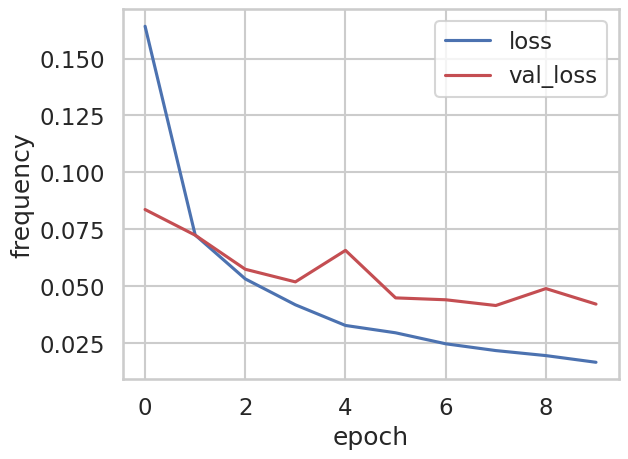

In [36]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

### Plotting Training and Validation Accuracy



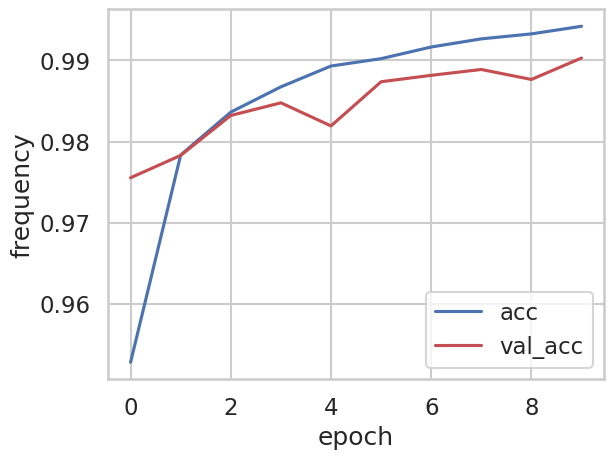

In [37]:
plt.plot(history.history["accuracy"], 'b', label="acc")
plt.plot(history.history["val_accuracy"], 'r', label="val_acc")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

### Loading Pre-trained Model Weights


In [29]:
model.load_weights("/kaggle/input/weights/best_val_loss_model.weights.h5")

### Evaluating the Model on Test Data

In [30]:
loss, accuracy = model.evaluate(test_data, test_labels)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

2766/2766 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9960 - loss: 0.0149
Loss:  0.015423194505274296
Accuracy:  0.9961012601852417


### Computing the Confusion Matrix
The confusion matrix shows where the model may be confused as well as how well it predicts each class, helping in evaluating the model's performance.



In [31]:
predictions = model.predict(test_data)
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

2766/2766 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step
[[2707    0    0 ...    0    0    0]
 [   1 1756    0 ...    0    2    0]
 [   0    0 4611 ...    0    0    0]
 ...
 [   0    0    0 ... 1458    0    0]
 [   0    0    1 ...    0 1376    0]
 [   0    0    1 ...    0    0 1371]]


### Visualizing the Confusion Matrix

This heatmap highlights areas of confusion and accurate predictions by displaying how well the model predicts each class in relation to the actual labels.


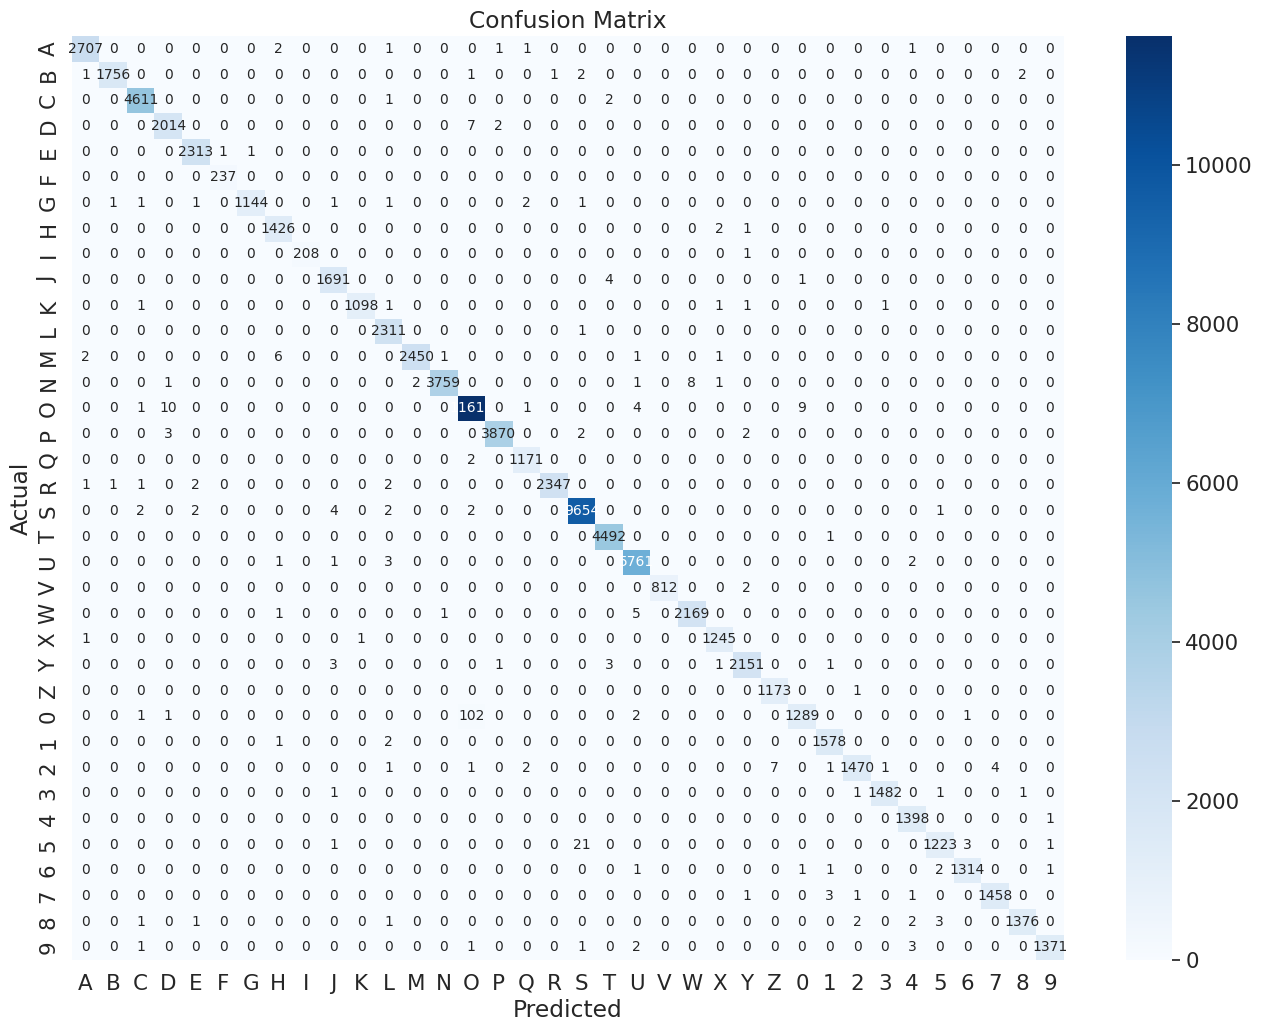

In [32]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(confusion, index=labels, columns=labels)

plt.figure(figsize=(16, 12))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Making Predictions

In [33]:
from numpy import argmax
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

The `load_image` function preprocesses any image in the same way as our dataset is preprocessed.  
The `predict` function predicts the class of the character

In [34]:
def load_image(filename):
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img /= 255.0
    return img

def predict(path):
    img = load_image(path)
    predict_value = model.predict(img)
    char_index = argmax(predict_value)
    if 0 <= char_index <= 25:
        char = chr(char_index + ord('A'))
    elif 26 <= char_index <= 35:
        char = chr(char_index - 26 + ord('0'))
    print(f"Character: {char}")

### Example

In [36]:
predict('/kaggle/input/new-ps/sample_img2.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Character: A
